In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [63]:
os.chdir("E:/Data Visualization/Datasets/Data Set/rajanand-crime-in-india/")

In [139]:
sll01 = pd.read_csv("07_02_Persons_arrested_by_sex_and_age_group_SLL_2012.csv")
sll02 = pd.read_csv("07_02_Persons_arrested_by_sex_and_age_group_SLL_2013.csv")
sll03 = pd.read_csv("07_02_Persons_arrested_by_sex_and_age_group_SLL_2014.csv")

ipc01 = pd.read_csv("07_01_Persons_arrested_by_sex_and_age_group_IPC_2012.csv")
ipc02 = pd.read_csv("07_01_Persons_arrested_by_sex_and_age_group_IPC_2013.csv")
ipc03 = pd.read_csv("07_01_Persons_arrested_by_sex_and_age_group_IPC_2014.csv")

In [140]:
sll01 = sll01[['STATE/UT','CRIME HEAD','Male Below 18 Years','Female Below 18 Years','Female Total']]
sll02 = sll02[['STATE/UT','CRIME HEAD','Male Below 18 Years','Female Below 18 Years','Female Total']]
sll03 = sll03[['States/UTs','Crime Head','Year','Total Female']]

In [141]:
sll01['Women'] = sll01['Female Total'] - sll01['Female Below 18 Years']
sll02['Women'] = sll02['Female Total'] - sll02['Female Below 18 Years']
sll01['Year'] = 2012
sll02['Year'] = 2013
sll03['Male Below 18 Years'] = np.nan
sll03['Female Below 18 Years'] = np.nan
sll01.drop(['Female Total'],axis=1,inplace=True)
sll02.drop(['Female Total'],axis=1,inplace=True)
sll03['Women'] = sll03['Total Female']
sll03.rename(columns={'States/UTs':'STATE/UT','Crime Head':'CRIME HEAD'},inplace=True)
sll03 = sll03[['STATE/UT','CRIME HEAD','Male Below 18 Years','Female Below 18 Years','Women','Year']]

In [142]:
ipc01['Adult Women'] = ipc01['Female Total'] - ipc01['Female Below 18 Years']
ipc01['Year'] = 2012
ipc02['Adult Women'] = ipc02['Female Total'] - ipc02['Female Below 18 Years']
ipc02['Year'] = 2012
ipc03['Adult Women'] = ipc03['Total Female']
ipc03['Female Below 18 Years'] = np.nan
ipc03['Male Below 18 Years'] = np.nan
ipc03['STATE/UT'] = ipc03['States/UTs']
ipc03['CRIME HEAD'] = ipc03['Crime Head']

In [143]:
ipc01 = ipc01[['STATE/UT','CRIME HEAD','Year','Female Below 18 Years','Male Below 18 Years','Adult Women']]
ipc02 = ipc02[['STATE/UT','CRIME HEAD','Year','Female Below 18 Years','Male Below 18 Years','Adult Women']]
ipc03 = ipc03[['STATE/UT','CRIME HEAD','Year','Female Below 18 Years','Male Below 18 Years','Adult Women']]

In [157]:
ipc01.head()

,STATE/UT,CRIME HEAD,Year,Female Below 18 Years,Male Below 18 Years,Adult Women
0,ANDHRA PRADESH,MURDER (SECTION 302 IPC),2012,3,65,517
1,ARUNACHAL PRADESH,MURDER (SECTION 302 IPC),2012,0,0,2
2,ASSAM,MURDER (SECTION 302 IPC),2012,0,38,44
3,BIHAR,MURDER (SECTION 302 IPC),2012,5,60,339
4,CHHATTISGARH,MURDER (SECTION 302 IPC),2012,5,64,110


In [151]:
def uppercase(df):
    val = list()
    for i in df:
        val.append(str(i).upper())
    return(val)

#val1 = list()
#val2 = list()
#val3 = list()
#for i in ipc03['STATE/UT']:
#    val1.append(str(i).upper())
#for i in sll03['STATE/UT']:
#    val2.append(str(i).upper())
#for i in sll02['STATE/UT']:
#    val3.append(str(i).upper())
 

ipc02['STATE/UT'] = uppercase(ipc02['STATE/UT'])
ipc03['STATE/UT'] = uppercase(ipc03['STATE/UT'])
sll03['STATE/UT'] = uppercase(sll03['STATE/UT'])
sll02['STATE/UT'] = uppercase(sll02['STATE/UT'])

In [165]:
ipc = ipc01.append(ipc02)
ipc = ipc.append(ipc03)

sll = sll01.append(sll02)
sll = sll.append(sll03)

In [166]:
print(ipc.shape)
print(sll.shape)

(5712, 6)
(4782, 6)


In [209]:
sll2.head()

,STATE/UT,CRIME HEAD,Male Below 18 Years,Female Below 18 Years,Women,Year,Child
0,ANDHRA PRADESH,ARMS ACT,4.0,0.0,0,2012,4.0
1,ARUNACHAL PRADESH,ARMS ACT,0.0,0.0,0,2012,0.0
2,ASSAM,ARMS ACT,2.0,0.0,3,2012,2.0
3,BIHAR,ARMS ACT,25.0,0.0,19,2012,25.0
4,CHHATTISGARH,ARMS ACT,17.0,0.0,0,2012,17.0


In [183]:
# sll2 = sll[sll['STATE/UT'] != ['TOTAL (UTS)','TOTAL (ALL-INDIA)','TOTAL (STATE)','TOTAL (STATES)','TOTAL (ALL INDIA)']]
sll2 = sll.loc[~sll['STATE/UT'].isin(['TOTAL (UTS)','TOTAL (UTs)','TOTAL (ALL-INDIA)','TOTAL (STATE)','TOTAL (STATES)','TOTAL (ALL INDIA)'])]

In [186]:
sll2['Child'] = sll2['Male Below 18 Years'] + sll2['Female Below 18 Years']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [197]:
sll_child = sll2.groupby(['STATE/UT']).sum()['Child']
state = list(sll_child.index)
child_crim = list(sll_child.values)
child_dict = ({'State':state,'Child Criminals':child_crim})
sll_child = pd.DataFrame(child_dict)

[Text(0,0,'TAMIL NADU'),
 Text(0,0,'GUJARAT'),
 Text(0,0,'MAHARASHTRA'),
 Text(0,0,'MADHYA PRADESH'),
 Text(0,0,'CHHATTISGARH'),
 Text(0,0,'BIHAR'),
 Text(0,0,'HARYANA'),
 Text(0,0,'RAJASTHAN'),
 Text(0,0,'UTTAR PRADESH'),
 Text(0,0,'WEST BENGAL')]

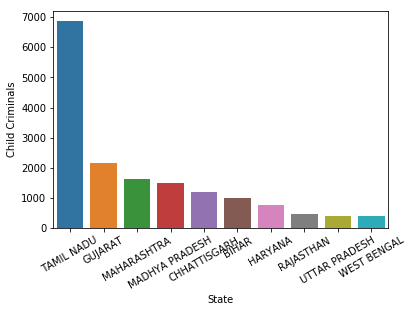

In [206]:
child_sll_plot = sns.barplot(x='State',y='Child Criminals',data=sll_child.sort_values('Child Criminals',ascending=False).head(10))
child_sll_plot = child_sll_plot.set_xticklabels(child_sll_plot.get_xticklabels(),rotation=30)
child_sll_plot

In [212]:
sll_women = sll2.groupby(['STATE/UT']).sum()['Women']
state = list(sll_women.index)
women_crim = list(sll_women.values)
women_dict = ({'State':state,'Women Criminals':women_crim})
sll_women = pd.DataFrame(women_dict)
print(sll_women)

                State  Women Criminals
0       A & N ISLANDS             1074
1         A&N ISLANDS              464
2      ANDHRA PRADESH            12289
3   ARUNACHAL PRADESH               76
4               ASSAM              104
5               BIHAR             6381
6          CHANDIGARH              246
7        CHHATTISGARH             5388
8        D & N HAVELI               18
9          D&N HAVELI               16
10        DAMAN & DIU              115
11              DELHI              864
12           DELHI UT             1170
13                GOA              849
14            GUJARAT           501379
15            HARYANA             1608
16   HIMACHAL PRADESH             1305
17    JAMMU & KASHMIR              293
18          JHARKHAND             2764
19          KARNATAKA            12921
20             KERALA             5237
21        LAKSHADWEEP                2
22     MADHYA PRADESH            18525
23        MAHARASHTRA            54009
24            MANIPUR    

[Text(0,0,'GUJARAT'),
 Text(0,0,'TAMIL NADU'),
 Text(0,0,'MAHARASHTRA'),
 Text(0,0,'MADHYA PRADESH'),
 Text(0,0,'UTTAR PRADESH'),
 Text(0,0,'KARNATAKA'),
 Text(0,0,'ANDHRA PRADESH'),
 Text(0,0,'PUNJAB'),
 Text(0,0,'ODISHA'),
 Text(0,0,'BIHAR')]

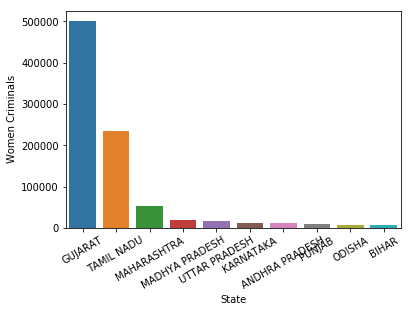

In [214]:
women_sll_plot = sns.barplot(x='State',y='Women Criminals',data=sll_women.sort_values('Women Criminals',ascending=False).head(10))
women_sll_plot = women_sll_plot.set_xticklabels(women_sll_plot.get_xticklabels(),rotation=30)
women_sll_plot

In [231]:
ipc2['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
       'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'A&N ISLANDS',
       'D&N HAVELI', 'DELHI UT'], dtype=object)

In [232]:
ipc2 = ipc.loc[~ipc['STATE/UT'].isin(['TOTAL (UTs)','TOTAL (ALL-INDIA)', 'TOTAL (STATES)','TOTAL (STATE)','TOTAL (UTS)', 'TELANGANA', 'TOTAL (ALL INDIA)'])]

In [222]:
ipc2.columns

Index(['STATE/UT', 'CRIME HEAD', 'Year', 'Female Below 18 Years',
       'Male Below 18 Years', 'Adult Women', 'Child'],
      dtype='object')

In [233]:
ipc2['Child'] = ipc2['Female Below 18 Years'] + ipc2['Male Below 18 Years']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
ipc_child = ipc2.groupby(['STATE/UT']).sum()['Child']
state = list(ipc_child.index)
child_crim = list(ipc_child.values)
child_dict = ({'State':state,'Child Criminals':child_crim})
ipc_child = pd.DataFrame(child_dict)

In [235]:
ipc_women = ipc2.groupby(['STATE/UT']).sum()['Adult Women']
state = list(ipc_women.index)
women_crim = list(ipc_women.values)
women_dict = ({'State':state,'Women Criminals':women_crim})
ipc_women = pd.DataFrame(women_dict)

[Text(0,0,'MAHARASHTRA'),
 Text(0,0,'MADHYA PRADESH'),
 Text(0,0,'ANDHRA PRADESH'),
 Text(0,0,'RAJASTHAN'),
 Text(0,0,'BIHAR'),
 Text(0,0,'CHHATTISGARH'),
 Text(0,0,'GUJARAT'),
 Text(0,0,'TAMIL NADU'),
 Text(0,0,'UTTAR PRADESH'),
 Text(0,0,'DELHI UT')]

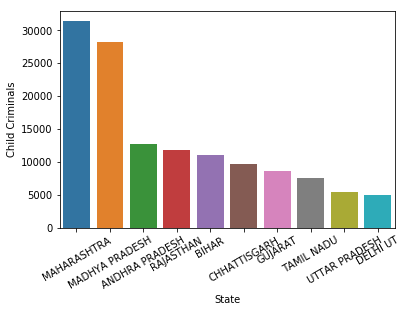

In [237]:
child_ipc_plot = sns.barplot(x='State',y='Child Criminals',data=ipc_child.sort_values('Child Criminals',ascending=False).head(10))
child_ipc_plot = child_ipc_plot.set_xticklabels(child_ipc_plot.get_xticklabels(),rotation=30)
child_ipc_plot

[Text(0,0,'MAHARASHTRA'),
 Text(0,0,'MADHYA PRADESH'),
 Text(0,0,'ANDHRA PRADESH'),
 Text(0,0,'WEST BENGAL'),
 Text(0,0,'TAMIL NADU'),
 Text(0,0,'GUJARAT'),
 Text(0,0,'BIHAR'),
 Text(0,0,'UTTAR PRADESH'),
 Text(0,0,'RAJASTHAN'),
 Text(0,0,'KARNATAKA')]

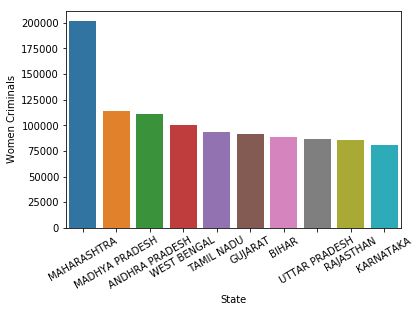

In [236]:
women_ipc_plot = sns.barplot(x='State',y='Women Criminals',data=ipc_women.sort_values('Women Criminals',ascending=False).head(10))
women_ipc_plot = women_ipc_plot.set_xticklabels(women_ipc_plot.get_xticklabels(),rotation=30)
women_ipc_plot